<a href="https://colab.research.google.com/github/hayleypc/BPCA_HFF/blob/main/BPCA_analysis_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c('data.table','ggplot2','magrittr','rstatix','plotrix','ggsignif',"googledrive",'openxlsx'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘Rcpp’




In [2]:
library(data.table)
library(ggplot2)
library(magrittr)
library(rstatix)
library(ggsignif)
library(plotrix)
library(googledrive)
library(openxlsx)


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=8c7bbb732b92a15e1a7c32e5634681e2&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbnMxbDdjai0tUVNmSTVfTWhjTktuS2NjdzRJUG1KYmNoU3E0OVUzTTZiUU0xYkpNdXo4VW5qZ3B0UVkzX2puZyIsInN0YXRlIjoiOGM3YmJiNzMyYjkyYTE1ZTFhN2MzMmU1NjM0NjgxZTIifQ==


In [4]:

# https://drive.google.com/file/d/1HlTOdV5IfKyUPac13dOoKbng7VKLvqVv/view?usp=drive_link
drive_download(file = as_id('1HlTOdV5IfKyUPac13dOoKbng7VKLvqVv'), path = '/content/firehistory_region_intersect.gpkg', overwrite = FALSE)

File downloaded:

• firehistory_region_intersect.gpkg <id: 1HlTOdV5IfKyUPac13dOoKbng7VKLvqVv>

Saved locally as:

• /content/firehistory_region_intersect.gpkg



In [5]:
# Coarse Woody Debris
# https://drive.google.com/file/d/1pXM6XIxxWL_Lsqyms1jtuuFcEHCjyLF0/view?usp=drive_link
drive_download(file = as_id('1pXM6XIxxWL_Lsqyms1jtuuFcEHCjyLF0'), path = '/content/cwd_rate_table.csv', overwrite = FALSE)

File downloaded:

• cwd_rate_table.csv <id: 1pXM6XIxxWL_Lsqyms1jtuuFcEHCjyLF0>

Saved locally as:

• /content/cwd_rate_table.csv



In [6]:
# LF fractionation
# https://drive.google.com/file/d/17BqkL6xDs2k7Q4PZEZNYMLqot95N5HEI/view?usp=sharing
drive_download(file = as_id('17BqkL6xDs2k7Q4PZEZNYMLqot95N5HEI'), path = '/content/LF_stoic_dt.csv', overwrite = TRUE)

File downloaded:

• LF_stoic_dt.csv <id: 17BqkL6xDs2k7Q4PZEZNYMLqot95N5HEI>

Saved locally as:

• /content/LF_stoic_dt.csv



In [51]:
cwd_rate_table <- fread('/content/cwd_rate_table.csv')
#bpca_dt <- fread('/content/bpca_dt.csv')
LF_stoic_dt <- fread('/content/LF_stoic_dt.csv')





In [22]:
LF_stoic_dt %>% names

[1] "V1"                             "site"                          
 [3] "Depth"                          "fraction"                      
 [5] "burn_severity"                  "depth_upper_cm"                
 [7] "depth_lower_cm"                 "fractionation_mass_recovered_g"
 [9] "starting_fract_mass_soil_g"     "mass_proportion_recovered"     
[11] "recovery"                       "C_perc"                        
[13] "N_perc"                         "rerun"                         
[15] "frac_notes"                     "accept"                        
[17] "BPCA_Run"                       "BPCA_Run2"                     
[19] "240_nm_PA"                      "216_nm_PA"                     
[21] "BPCA_rep1_notes"                "240_nm_PA_dupe"                
[23] "216_nm_PA_dupe"                 "BPCA_rep2_notes"               
[25] "blank1_240_nm_PA"               "blank1_216_nm_PA"              
[27] "blank2_240_nm_PA"               "blank2_216_nm_PA"              
[29] "PA_240_nm"                      "PA_216_nm"                     
[31] "conc_240"                       "conc_216"                      
[33] "blank_conc_240"                 "blank_conc_216"                
[35] "conc_avg"                       "bpca_starting_mass_mg"

In [23]:
LF_stoic_dt$Depth %>% unique


[1] "0-5"    "20-Oct" "20-30"  "10-May" NA       "30-Oct"

In [52]:
date_to_depth <- data.table(
  date = c("0-5", "20-Oct", "20-30", "10-May",NA,"30-Oct"),
  depth = c("0-5 cm", "5-10 cm", "20-30 cm", "10-20 cm",NA, "10-30 cm"))

LF_stoic_dt[, Depth := date_to_depth[Depth, on = "date", depth]]

  unique(LF_stoic_dt$Depth)

[1] "0-5 cm"   "5-10 cm"  "20-30 cm" "10-20 cm" NA         "10-30 cm"

In [25]:
LF_stoic_dt %>% head

V1,site,Depth,fraction,burn_severity,depth_upper_cm,depth_lower_cm,fractionation_mass_recovered_g,starting_fract_mass_soil_g,mass_proportion_recovered,⋯,blank2_240_nm_PA,blank2_216_nm_PA,PA_240_nm,PA_216_nm,conc_240,conc_216,blank_conc_240,blank_conc_216,conc_avg,bpca_starting_mass_mg
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CH1,0-5,BULK,control,0,5,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,CH1,0-5,HF,control,0,5,22.88,30,0.763,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,CH1,0-5,LF,control,0,5,6.44,30,0.215,⋯,NA,NA,1554221,42392019,0.04890718,0.05259535,0.02682928,0.01878626,0.05075127,3.961
4,CH1,5-10,BULK,control,10,20,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,CH1,5-10,HF,control,10,20,27.08,30,0.903,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,CH1,5-10,LF,control,10,20,4.04,30,0.135,⋯,NA,NA,4136315,73584560,0.14852540,0.16005198,0.02682928,0.01878626,0.15428869,3.510


In [53]:
LF_stoic_dt$burn_severity <- factor(LF_stoic_dt$burn_severity,
                                    levels = c('control', 'low', 'moderate', 'high'))

In [54]:
LF_stoic_dt$Depth <- factor(LF_stoic_dt$Depth,
                                   levels = c('0-5 cm', '5-10 cm', '10-20 cm', '20-30 cm','10-30 cm'))

 LF_stoic_dt$Depth %>% unique

[1] 0-5 cm   5-10 cm  20-30 cm 10-20 cm <NA>     10-30 cm
Levels: 0-5 cm 5-10 cm 10-20 cm 20-30 cm 10-30 cm

In [42]:
#LF_stoic_dt$Depth <- factor(LF_stoic_dt$Depth,
 #                                   levels = c('0-5', '5-10', '10-20', '20-30','10-30'))

Warning message:
“Removed 323 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 323 rows containing missing values (`geom_point()`).”


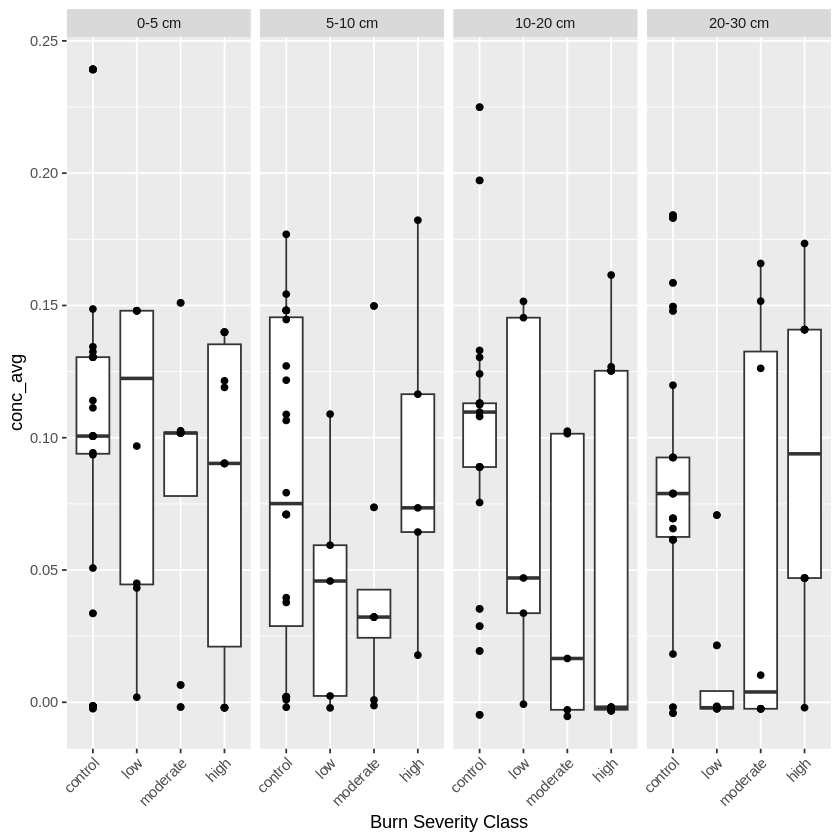

In [55]:
LF_stoic_dt <- LF_stoic_dt[!is.na(burn_severity) & burn_severity != 'blank' & Depth != '10-30']

ggplot(LF_stoic_dt, aes(x = burn_severity, y = conc_avg)) +
  geom_boxplot() +
  geom_point() +
  facet_grid(. ~ Depth) +
  xlab('Burn Severity Class') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 3 rows containing non-finite values (`stat_bin()`).”


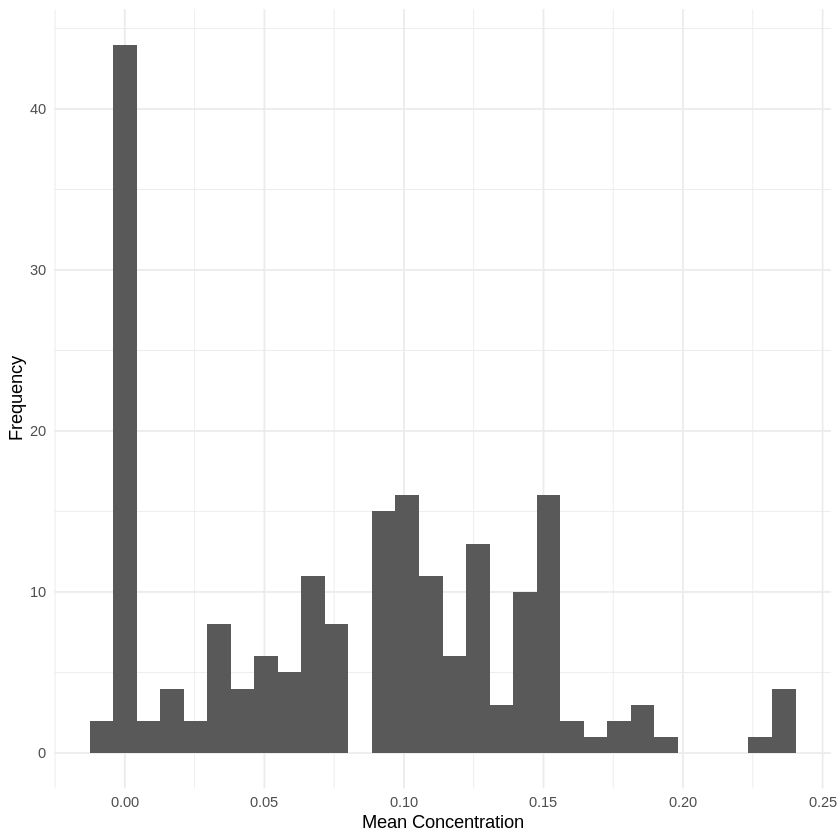

In [79]:
ggplot(LF_stoic_dt[!is.na(burn_severity) & burn_severity != 'blank' & Depth != '10-30 cm' & fraction == 'LF' & accept == "T",], aes(x = conc_avg)) +
  geom_histogram() +
  labs(x = "Mean Concentration", y = "Frequency") +
  theme_minimal()


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 323 rows containing non-finite values (`stat_bin()`).”


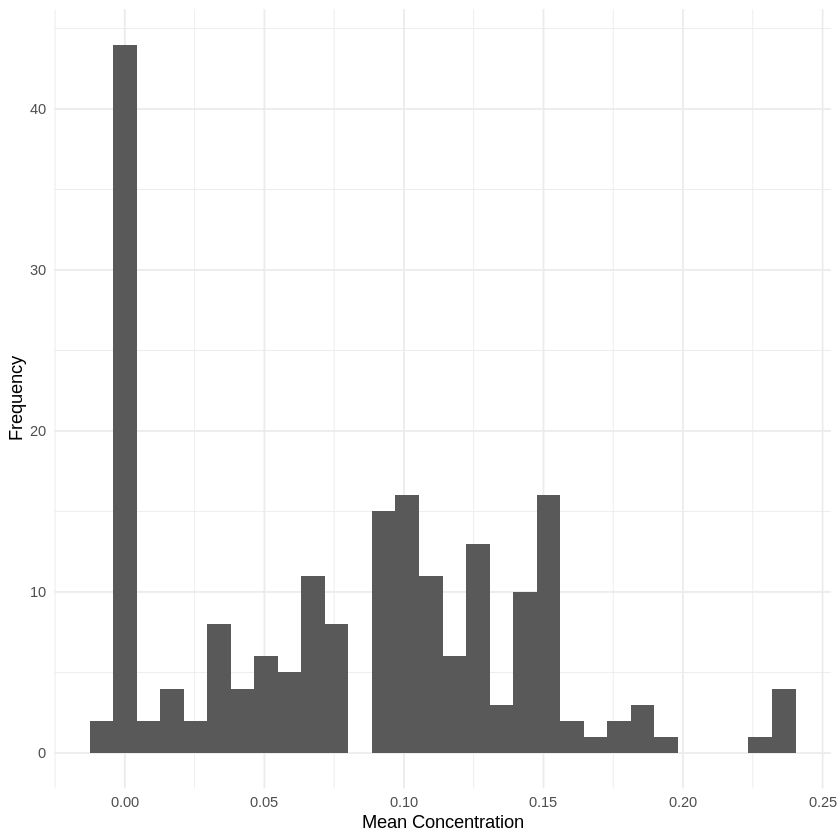

In [70]:
ggplot(LF_stoic_dt, aes(x = conc_avg)) +
  geom_histogram() +
  labs(x = "Mean Concentration", y = "Frequency") +
  theme_minimal()

In [76]:
#LF_stoic_dt[conc_avg<0.01] %>% print

LF_stoic_dt$accept %>% unique

LF_stoic_dt %>% names


[1] "T" "F"

[1] "V1"                             "site"                          
 [3] "Depth"                          "fraction"                      
 [5] "burn_severity"                  "depth_upper_cm"                
 [7] "depth_lower_cm"                 "fractionation_mass_recovered_g"
 [9] "starting_fract_mass_soil_g"     "mass_proportion_recovered"     
[11] "recovery"                       "C_perc"                        
[13] "N_perc"                         "rerun"                         
[15] "frac_notes"                     "accept"                        
[17] "BPCA_Run"                       "BPCA_Run2"                     
[19] "240_nm_PA"                      "216_nm_PA"                     
[21] "BPCA_rep1_notes"                "240_nm_PA_dupe"                
[23] "216_nm_PA_dupe"                 "BPCA_rep2_notes"               
[25] "blank1_240_nm_PA"               "blank1_216_nm_PA"              
[27] "blank2_240_nm_PA"               "blank2_216_nm_PA"              
[29] "PA_240_nm"                      "PA_216_nm"                     
[31] "conc_240"                       "conc_216"                      
[33] "blank_conc_240"                 "blank_conc_216"                
[35] "conc_avg"                       "bpca_starting_mass_mg"

Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”


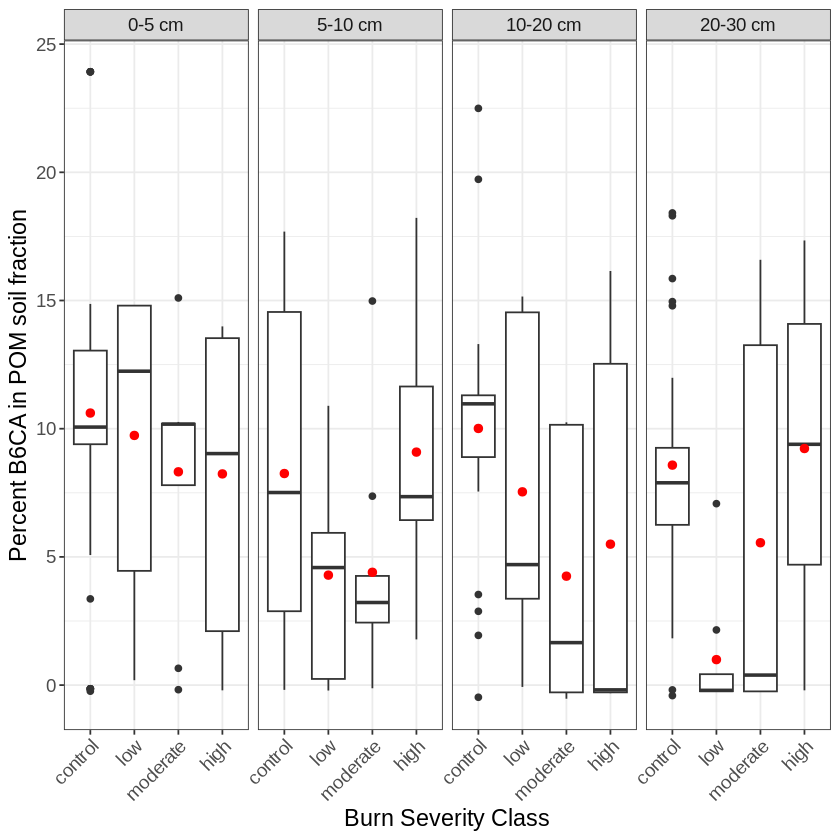

In [78]:
means_data <- LF_stoic_dt[!is.na(burn_severity) & burn_severity != 'blank' & Depth != '10-30 cm' & fraction == 'LF' & accept == "T",
                          .(mean_conc = mean(conc_avg, na.rm = TRUE)*100),
                          by = .(burn_severity, Depth)]

ggplot(LF_stoic_dt[!is.na(burn_severity) & burn_severity != 'blank' & Depth != '10-30 cm' & fraction == 'LF' & accept == "T",],
  aes(x = burn_severity, y = conc_avg*100)) +
  geom_boxplot() +
  geom_point(data = means_data, aes(y = mean_conc), color = "red", size = 2) +
  facet_grid(. ~ Depth) +
  ylab('Percent B6CA in POM soil fraction') +
  xlab('Burn Severity Class') +
  theme_bw()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1), text = element_text(size = 14))
 # scale_y_continuous(limits = c(0, NA))


Warning message:
“Removed 323 rows containing non-finite values (`stat_boxplot()`).”


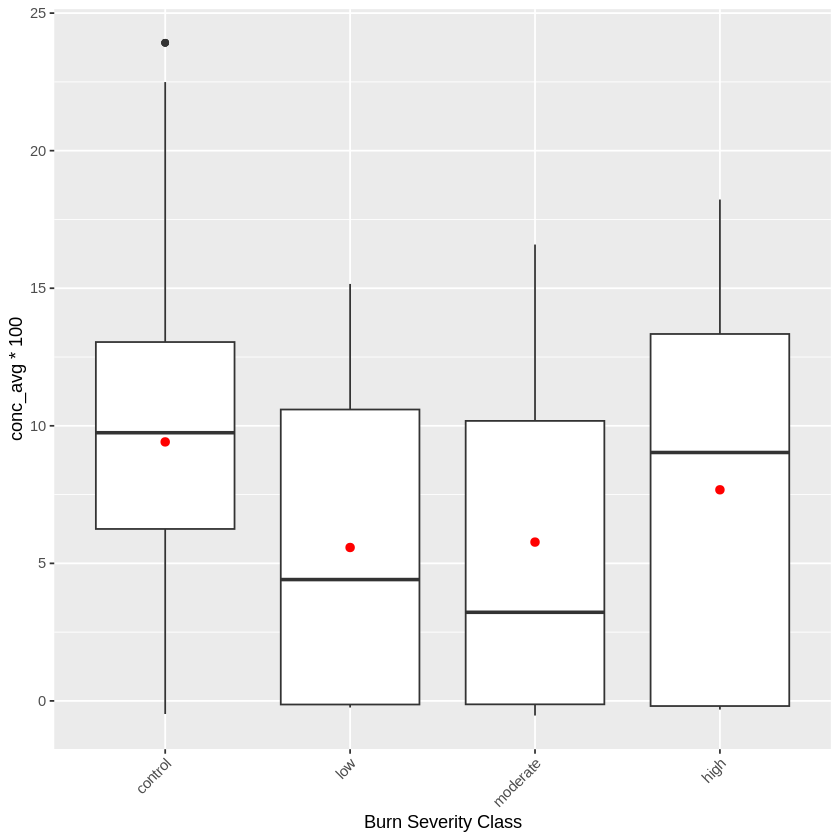

In [62]:
means_data <- LF_stoic_dt[!is.na(burn_severity) & burn_severity != 'blank' & Depth != '10-30 cm',
                          .(mean_conc = mean(conc_avg, na.rm = TRUE)*100),
                          by = .(burn_severity)]

ggplot(LF_stoic_dt, aes(x = burn_severity, y = conc_avg*100)) +
    geom_boxplot( ) +
    geom_point(data = means_data, aes(y = mean_conc), color = "red", size = 2) +
    # facet_grid(.~.) +
    # ylim(0,1000000)+
    xlab('Burn Severity Class') +
        theme(axis.text.x = element_text(angle = 45, hjust=1))

In [ ]:
bpca_dt[!is.na(`Burn_severity`) &
        Burn_severity != 'blank'  &
        Depth != '10-30' ] %>%

ggplot(aes(x = factor(Burn_severity,
        level=c('control', 'low', 'moderate','high')),
        y = conc_mean)) +
    geom_boxplot( ) +
    geom_point()+
    # geom_smooth(method = 'lm')+
    # facet_grid(.~.) +
    #  ylim(0,10000000)+
#   geom_smooth(method = 'lm')+
    xlab('Burn Severity Class') +
        theme(axis.text.x = element_text(angle = 45, hjust=1))

In [ ]:

LF_stoic_dt[,Depth := factor(Depth, levels = c('0-5','5-10','10-20','20-30'))]
LF_stoic_dt[,conc_avg := mean(c(conc_216,conc_240),na.rm=T),by=1:nrow(LF_stoic_dt)]



LF_stoic_dt[!is.na(Depth)][,list(conc_avg = mean(conc_avg,na.rm=T)),by=.(site,burn_severity)] %>%
ggplot(aes(y=conc_avg,x=burn_severity))+
  geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
            map_signif_level=TRUE,step_increase=.05) +
    geom_boxplot(aes(group=burn_severity))
    # facet_wrap(.~.)

In [ ]:
LF_stoic_dt %>% names

In [ ]:
# LF_stoic_dt <- fread
LF_stoic_dt[,Depth := paste0(depth_upper_cm %>% as.numeric,'-',depth_lower_cm %>% as.numeric) %>%  factor(levels= c('0-5','5-10','10-20','10-30','20-30','blank'))]

In [ ]:
LF_stoic_dt %>% names

In [ ]:
# (conc_240/bpca_starting_mass_mg)*(fractionation_mass_recovered_g/starting_fract_mass_soil_g)*(C/100)
LF_stoic_dt[,g_kg := (conc_avg/bpca_starting_mass_mg) ]
LF_stoic_dt[,g_kg := mass_proportion_recovered/conc_avg,by=1:nrow(LF_stoic_dt)]
LF_stoic_dt$g_kg <- (LF_stoic_dt$conc_avg/LF_stoic_dt$bpca_starting_mass_mg)
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),list(g_kg=mean(g_kg,na.rm = T)),by=.(burn_severity,site)] %>%
ggplot(aes(x = burn_severity, y = g_kg)) +
  geom_boxplot() +
  # geom_point(aes(y=group_mean),color='red')+
  #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
  ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
  xlab('Soil Burn Severity Class') +
      theme_bw()+
      theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
  geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
            map_signif_level=TRUE,step_increase=.05) +
  # facet_grid(.~Depth) +
  coord_cartesian(expand=TRUE)

In [ ]:

LF_stoic_dt$g_kg <- (LF_stoic_dt$conc_avg/LF_stoic_dt$bpca_starting_mass_mg)
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),list(g_kg=mean(g_kg,na.rm = T)),by=.(burn_severity,site,Depth)] %>%
aov(g_kg ~ burn_severity, data = .) %>%
summary()

In [ ]:

LF_stoic_dt$g_kg <- (LF_stoic_dt$conc_avg/LF_stoic_dt$bpca_starting_mass_mg)
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),] %>%
ggplot(aes(x = burn_severity, y = g_kg)) +
  geom_boxplot() +
  # geom_point(aes(y=group_mean),color='red')+
  #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
  ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
  xlab('Soil Burn Severity Class') +
      theme_bw()+
      theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
  geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
            map_signif_level=TRUE,step_increase=.05) +
  facet_grid(.~Depth) +
  coord_cartesian(expand=TRUE)

In [ ]:
LF_stoic_dt$g_kg <- (LF_stoic_dt$conc_avg/LF_stoic_dt$bpca_starting_mass_mg)
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity)&fraction!='BULK',] %>%
ggplot(aes(x = burn_severity, y = C_perc)) +
  geom_boxplot() +
  # geom_point(aes(y=group_mean),color='red')+
  #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
  ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
  xlab('Soil Burn Severity Class') +
      theme_bw()+
      theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
  # geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
  #           map_signif_level=TRUE,step_increase=.05) +
  facet_grid(fraction~Depth,scales='free') +
  coord_cartesian(expand=TRUE)

In [ ]:
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),][fraction !='BULK'][C_perc/N_perc <100] %>%
ggplot(aes(x = burn_severity, y =C_N)) +
  geom_boxplot() +
  # geom_point(aes(y=group_mean),color='red')+
  #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
  ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
  xlab('Soil Burn Severity Class') +
      theme_bw()+
      theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
  # geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
  #           map_signif_level=TRUE,step_increase=.05) +
  facet_grid(fraction~Depth,scales = 'free_y') +
  coord_cartesian(expand=TRUE)

In [ ]:
LF_stoic_dt[!is.na(Depth)&!is.na(burn_severity),][fraction !='BULK'][C_perc/N_perc <100] %>%
ggplot(aes(x = burn_severity, y =C_N,group=burn_severity)) +
  geom_boxplot() +
  # geom_point(aes(y=group_mean),color='red')+
  #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
  #ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
  ylab('') +
  xlab('Soil Burn Severity Class') +
      theme_bw()+
      theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
  # geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
  #           map_signif_level=TRUE,step_increase=.05) +
  facet_grid(fraction~Depth,scales = 'free_y') +
  coord_cartesian(expand=TRUE)